In [19]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('final_data.csv', encoding='utf-8')

In [5]:
df.head()

,Unnamed: 0,날짜,호선,역번호,역명,인원
0,0,2020-01-01,1호선,150,서울역,121.0
1,192778,2020-01-01,1호선,150,서울역,-672.0
2,385556,2020-01-01,1호선,150,서울역,-515.0
3,578334,2020-01-01,1호선,150,서울역,-269.0
4,771112,2020-01-01,1호선,150,서울역,-771.0


In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.columns

Index(['날짜', '호선', '역번호', '역명', '인원'], dtype='object')

In [9]:
df

,날짜,호선,역번호,역명,인원
0,2020-01-01,1호선,150,서울역,121.0
1,2020-01-01,1호선,150,서울역,-672.0
2,2020-01-01,1호선,150,서울역,-515.0
3,2020-01-01,1호선,150,서울역,-269.0
4,2020-01-01,1호선,150,서울역,-771.0
...,...,...,...,...,...
3662777,2023-10-31,8호선,2828,남위례,-535.0
3662778,2023-10-31,8호선,2828,남위례,-160.0
3662779,2023-10-31,8호선,2828,남위례,-133.0
3662780,2023-10-31,8호선,2828,남위례,-159.0


In [10]:
s = df['역명']
s

0          서울역
1          서울역
2          서울역
3          서울역
4          서울역
          ... 
3662777    남위례
3662778    남위례
3662779    남위례
3662780    남위례
3662781    남위례
Name: 역명, Length: 3662782, dtype: object

In [11]:
len(s)

3662782

In [25]:
data1 = df[df['역명']==s[1]]
data1.columns

Index(['Unnamed: 0', '날짜', '호선', '역번호', '역명', '인원'], dtype='object')

In [26]:
data1

,Unnamed: 0,날짜,호선,역번호,역명,인원
0,0,2020-01-01,1호선,150,서울역,121.0
1,192778,2020-01-01,1호선,150,서울역,-672.0
2,385556,2020-01-01,1호선,150,서울역,-515.0
3,578334,2020-01-01,1호선,150,서울역,-269.0
4,771112,2020-01-01,1호선,150,서울역,-771.0
...,...,...,...,...,...,...
2872073,2850053,2022-12-30,1호선,150,서울역,434.0
2872074,3042831,2022-12-30,1호선,150,서울역,1126.0
2872075,3235609,2022-12-30,1호선,150,서울역,1037.0
2872076,3428387,2022-12-30,1호선,150,서울역,884.0


In [27]:
len(data1)

20615

In [28]:
data1.shape

(20615, 6)

In [33]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 7

In [34]:
data = data1['인원']
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop')

# 모델 학습
hist = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/50
1031/1031 [==============================] - 8s 5ms/step - loss: 0.0107 - val_loss: 0.0084
Epoch 2/50
1031/1031 [==============================] - 5s 5ms/step - loss: 0.0062 - val_loss: 0.0070
Epoch 3/50
1031/1031 [==============================] - 5s 5ms/step - loss: 0.0052 - val_loss: 0.0064
Epoch 4/50
1031/1031 [==============================] - 5s 5ms/step - loss: 0.0049 - val_loss: 0.0057
Epoch 5/50
1031/1031 [==============================] - 5s 5ms/step - loss: 0.0047 - val_loss: 0.0057
Epoch 6/50
1031/1031 [==============================] - 5s 5ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 7/50
1031/1031 [==============================] - 5s 5ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 8/50
1031/1031 [==============================] - 5s 5ms/step - loss: 0.0045 - val_loss: 0.0056
Epoch 9/50
1031/1031 [==============================] - 5s 5ms/step - loss: 0.0045 - val_loss: 0.0054
Epoch 10/50
1031/1031 [==============================] - 5s 5ms/step - loss: 0.004

In [35]:
# 테스트 데이터를 사용하여 모델 예측
test_predictions = model.predict(x_test)

# 예측값을 원래 스케일로 변환
test_predictions = scaler.inverse_transform(test_predictions)

# 예측값 확인
for i in range(19):
    print(f"실제값: {test[i]}, 예측값: {test_predictions[i]}")


129/129 [==============================] - 1s 2ms/step
실제값: [0.5044805], 예측값: [448.51007]
실제값: [0.3907928], 예측값: [-60.328632]
실제값: [0.41993296], 예측값: [123.97976]
실제값: [0.466995], 예측값: [-535.1394]
실제값: [0.4436008], 예측값: [484.77695]
실제값: [0.48895273], 예측값: [-57.927162]
실제값: [0.5388193], 예측값: [283.67136]
실제값: [0.50208634], 예측값: [-114.27368]
실제값: [0.5049593], 예측값: [377.78262]
실제값: [0.4600178], 예측값: [212.52217]
실제값: [0.5318421], 예측값: [348.96762]
실제값: [0.5208291], 예측값: [164.70105]
실제값: [0.5375197], 예측값: [-196.69609]
실제값: [0.5083111], 예측값: [32.59062]
실제값: [0.5378617], 예측값: [-658.9092]
실제값: [0.53772485], 예측값: [-282.37216]
실제값: [0.5499008], 예측값: [-459.9323]
실제값: [0.5377933], 예측값: [-562.6853]
실제값: [0.50290716], 예측값: [-318.8865]


In [36]:
# train 데이터를 사용하여 모델 예측
train_predictions = model.predict(x_train)

# 예측값을 원래 스케일로 변환
train_predictions = scaler.inverse_transform(train_predictions)

# 예측값 확인
for i in range(19):
    print(f"실제값: {train[i]}, 예측값: {train_predictions[i]}")


516/516 [==============================] - 1s 2ms/step
실제값: [0.5136466], 예측값: [168.94893]
실제값: [0.45940214], 예측값: [-76.97249]
실제값: [0.4701416], 예측값: [418.37494]
실제값: [0.48696902], 예측값: [-326.57278]
실제값: [0.45263013], 예측값: [656.8436]
실제값: [0.48915794], 예측값: [418.56143]
실제값: [0.5218551], 예측값: [666.8355]
실제값: [0.50393325], 예측값: [624.3593]
실제값: [0.5375197], 예측값: [707.66656]
실제값: [0.4887475], 예측값: [304.2834]
실제값: [0.55229497], 예측값: [860.54236]
실제값: [0.5628292], 예측값: [443.90146]
실제값: [0.5793146], 예측값: [104.95971]
실제값: [0.57924616], 예측값: [-190.48198]
실제값: [0.5847869], 예측값: [-425.35455]
실제값: [0.552637], 예측값: [-405.32327]
실제값: [0.5971681], 예측값: [-280.7366]
실제값: [0.5780149], 예측값: [-463.88828]
실제값: [0.5401874], 예측값: [-260.8147]


In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(data1)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

         Unnamed: 0          날짜   호선  역번호   역명      인원
0                 0  2020-01-01  1호선  150  서울역   121.0
1            192778  2020-01-01  1호선  150  서울역  -672.0
2            385556  2020-01-01  1호선  150  서울역  -515.0
3            578334  2020-01-01  1호선  150  서울역  -269.0
4            771112  2020-01-01  1호선  150  서울역  -771.0
5            963890  2020-01-01  1호선  150  서울역  -237.0
6           1156668  2020-01-01  1호선  150  서울역   241.0
7           1349446  2020-01-01  1호선  150  서울역   -21.0
8           1542224  2020-01-01  1호선  150  서울역   470.0
9           1735002  2020-01-01  1호선  150  서울역  -243.0
10          1927780  2020-01-01  1호선  150  서울역   686.0
11          2120558  2020-01-01  1호선  150  서울역   840.0
12          2313336  2020-01-01  1호선  150  서울역  1081.0
13          2506114  2020-01-01  1호선  150  서울역  1080.0
14          2698892  2020-01-01  1호선  150  서울역  1161.0
15          2891670  2020-01-01  1호선  150  서울역   691.0
16          3084448  2020-01-01  1호선  150  서울역  1342.0
17        

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


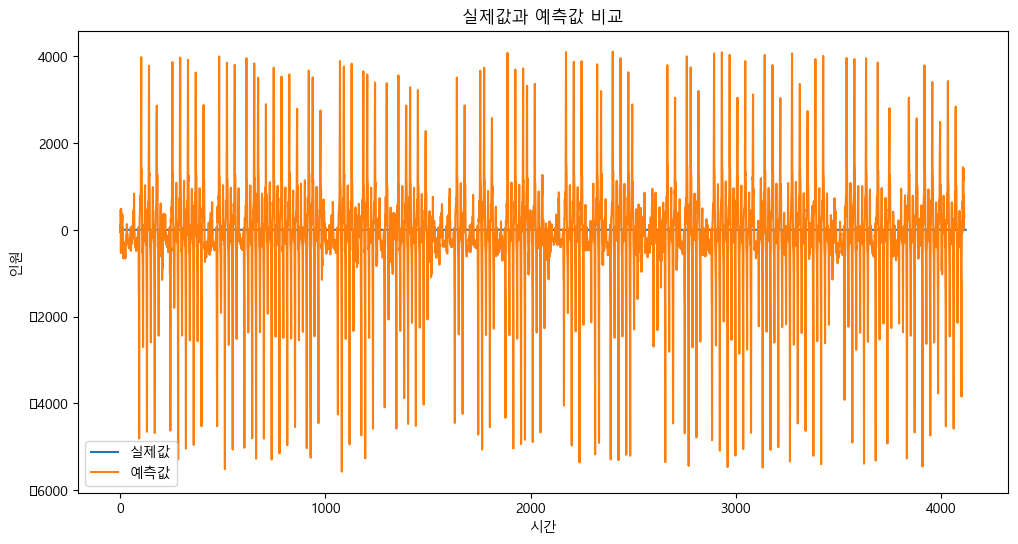

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path, size=14)
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 6))
plt.plot(test, label='실제값')
plt.plot(test_predictions, label='예측값')
plt.title('실제값과 예측값 비교')
plt.xlabel('시간')
plt.ylabel('인원')
plt.legend()
plt.show()

In [ ]:
<1>
# 일단 일별 데이터를 통합해서 저번 모델에 적용시켜 봤는데, 이렇게 하는게 맞나 싶음
# https://github.com/Lay4U/CapstOne/tree/master/python/test_plt
# 그냥 무작정 모델을 생성하고 임의의 look back, size 등을 설정했는데, 위 주소처럼 일일히 넣어보고 손실률이나 정확도가 가장 좋은 것을
# 시켜야 좋을 것같긴한데 아직 잘 모르겠음. 추후에 의논해봐야 할 듯

<2>
# 사실 이 예측값을 출력하는 테스트 방식이 잘못된 것 같음. 우리가 지금 참고하고 있는 깃헙을 보면 각 역별 승차인원을 각각 생성해서 따로
# 파일에 저장되어있는데 아마 해당 csv 파일을 넣어서 결과를 도출하는 것 같은데... 정확히는 아직 모르겠음
# https://github.com/Lay4U/CapstOne/tree/master/HL/tensorflow_android_model/app/assets     <- 요거는 asset 파일에 모델
# https://github.com/Lay4U/CapstOne/tree/master/HL/MySubwayProject/app/assets    <- 역별 csv 파일들

# 이거 솔직히 너무 어려움, 검색해도 나오는 내용도 없고, 해당 내용 자체가 정보가 진짜 없음... 그래서 참고하는 
# 깃헙이랑 gpt로 의존하고 있는데 이래도 되나 싶음... 